In [1]:
import pandas as pd
import numpy as np

In [5]:
complete_df = pd.read_csv('crib.csv')

In [6]:
def bw(x):
    if x>1350.0:
        return 0
    elif x>850.0 and x<=1350.0:
        return 1
    elif x>701.0 and x<=850.0:
        return 4
    else:
        return 7
    
def ga(x):
    if x>24.0:
        return 0
    else:
        return 1    
    
def be(x):
    if x>7.0:
        return 0
    elif x>-9.9 and x<=-7.0:
        return 1
    elif x>-14.9 and x<=-10.0:
        return 2
    else:
        return 4

def min_fio2_FUNC(x):
    if x<40.0:
        return 0
    elif x>41.0 and x<=80.0:
        return 2
    elif x>81.0 and x<=90.0:
        return 3
    else:
        return 4

def max_fio2_FUNC(x):
    if x<40.0:
        return 0
    elif x>41.0 and x<=80.0:
        return 1
    elif x>81.0 and x<=90.0:
        return 3
    else:
        return 5



In [7]:
complete_df['CRIB'] = complete_df.birthweight.apply(bw) + complete_df.gestationweekbylmp.apply(ga) + complete_df.max_be.apply(be) + complete_df.min_fio2.apply(min_fio2_FUNC)+complete_df.max_fio2.apply(max_fio2_FUNC)

In [8]:
def crib_prob(x):
    if x>=15:
        return 1.0
    elif x>11 and x<=15:
        return 0.73
    elif x>6 and x<=10:
        return 0.55
    else:
        return 0.09

In [9]:
complete_df['pred'] = complete_df.CRIB.apply(crib_prob)

In [10]:
def bina(x):
    if x == 'Death':
        return 1
    else:
        return 0

In [11]:
complete_df.dischargestatus = complete_df.dischargestatus.apply(bina)

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve\


lr_fpr, lr_tpr, _ = roc_curve(complete_df.dischargestatus,complete_df.pred,drop_intermediate=False)

In [13]:
import matplotlib.pyplot as plt

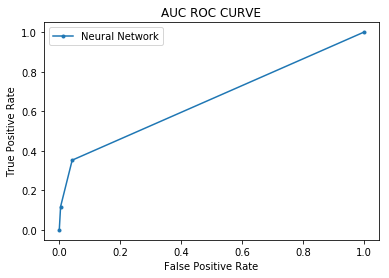

In [14]:
plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
plt.legend(loc=0)

In [15]:
roc_auc_score(complete_df.dischargestatus,complete_df.pred)

0.6570289132602194

In [16]:
ds = pd.DataFrame(complete_df.pred)
ds['true_outcome'] = complete_df.dischargestatus

In [18]:
def classify(x):
    if x>0.5:
        return 1
    else:
        return 0

In [19]:
complete_df.pred_1 = complete_df.pred.apply(classify)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(complete_df.dischargestatus,complete_df.pred_1))
print(confusion_matrix(complete_df.dischargestatus,complete_df.pred_1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       236
           1       0.38      0.35      0.36        17

   micro avg       0.92      0.92      0.92       253
   macro avg       0.66      0.66      0.66       253
weighted avg       0.91      0.92      0.92       253

[[226  10]
 [ 11   6]]
